# Threat prediction

This notebook train a classification algorithm for detection of different types of attack. Classes inslude valid requests, sql injection, xss, command injection and path traversal attacks. Features are calculated using TFIDF on characters and N-grams and SVM is used for classification.

using TFIDF on character N-grams and SVM classification

In [1]:
import pandas as pd
import numpy as np

In [13]:
# ../상대 경로 read_json : json elr
data_df = pd.read_json('../Dataset/complete_clean.json', 'records')

/var/folders/kv/vn32wd3d3h31mygq2s73s8w80000gn/T/ipykernel_93228/2984168884.py:2: FutureWarning: Starting with pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only.
  data_df = pd.read_json('../Dataset/complete_clean.json', 'records')


In [3]:
data_df

,pattern,type
0,crteyreti=wsn&et3tf6shov=tdsviee y fum$oh3;ore...,valid
1,*;q=0.7,valid
2,nhgiopie/7.8.4.7.0,valid
3,/dyylkl.xd9cpu/4ot0ta/ts6xnrp1/hssh/a2cuerht/s...,valid
4,/2m6vlb1r37jspc/cwvv/mbar/oqrd0/msc/etceebwgi/...,valid
...,...,...
90248,<img onpointerenter=alert(1)>xss</img>,xss
90249,"<source onbeforepaste=""alert(1)"" contenteditab...",xss
90250,"<div draggable=""true"" contenteditable>drag me<...",xss
90251,"<li><cite id=""citerefdomingos2015"" class=""cita...",valid


In [16]:
counts = data_df['type'].value_counts()
print(counts)

valid             60623
sqli              13153
xss                9730
cmdi               3461
path-traversal     3286
Name: type, dtype: int64


In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [10]:
counts.plot.pie(figsize=(5, 5))

<IPython.core.display.Javascript object>

<AxesSubplot: ylabel='type'>

In [11]:
X = data_df['pattern'].to_numpy().astype(str)
y = data_df['type'].to_numpy().astype(str)

In [12]:
print(len(X))       #pattern
print(len(y))       #type

90253
90253


#### Import Lib

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline  #make_pipline 함수 사용해서 파이프라인 생성
from sklearn.model_selection import GridSearchCV, train_test_split

train_set / test_set 분리

In [17]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

np.savez('dataset', trainX=trainX, testX=testX, trainY=trainY, testY=testY)

In [13]:
pipe = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024), SVC())
"""
make_pipeline 함수 사용하여 파이프라인 생성
TFidVectorizer: TF-IDF(Term Frequency-Inverse Documnet Frequency)표현을 사용하여
텍스트입력 -> 숫자 피처 변환
- input= 'content' : 입력을 원시 ㅔㅌㄱ스트 데이터로 처리
- lowercase = True : 처리하기 전에 모든 텍스트를 소문자로 변환
- analyzer = 'char' : 문자 수준에서 텍스트를 분석('word'는 단어 수준 분석에 사용)
- max_features=1024 : 1024개의 가장 중요한 피처로 어휘 크기 제한

SVC(Support Vector Classifier): 분류 알고리즘

"""



param_grid = {'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 4)], 'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf']}
"""
그리드 파라미터
tfidvectorizer__ngram_range : TFidfVectorizer n-그램 범위 변경
"""



#교차검증 cv(cross-validation)/ verbose=4 : 그리드 서치 중에 자세한 정보를 출력
grid = GridSearchCV(pipe, param_grid, cv = 2, verbose = 4)

grid.fit(trainX, trainY)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1), score=0.959, total=  43.9s
[CV] svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.0s remaining:    0.0s


[CV]  svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1), score=0.960, total=  43.6s
[CV] svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV]  svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2), score=0.985, total= 2.3min
[CV] svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2) 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.7min remaining:    0.0s


[CV]  svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2), score=0.986, total= 2.3min
[CV] svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4) 
[CV]  svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4), score=0.986, total= 2.2min
[CV] svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4) 
[CV]  svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4), score=0.987, total= 2.2min
[CV] svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1) ..
[CV]  svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1), score=0.982, total=  39.4s
[CV] svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1) ..
[CV]  svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1), score=0.983, total=  40.0s
[CV] svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 2) ..
[CV]  svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 2), score=0.989, total= 3.4min
[CV] svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngr

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 48.0min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='char',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=1024,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                               

In [14]:
grid.score(testX, testY)

0.995789753589789

In [15]:
from sklearn.metrics import classification_report

#classification_report   레포트 설명

preds = grid.predict(testX)

print(classification_report(testY, preds))

                precision    recall  f1-score   support

          cmdi       0.99      0.98      0.98       865
path-traversal       1.00      0.97      0.98       822
          sqli       1.00      0.99      0.99      3288
         valid       1.00      1.00      1.00     15156
           xss       1.00      1.00      1.00      2433

      accuracy                           1.00     22564
     macro avg       0.99      0.99      0.99     22564
  weighted avg       1.00      1.00      1.00     22564



<IPython.core.display.Javascript object>


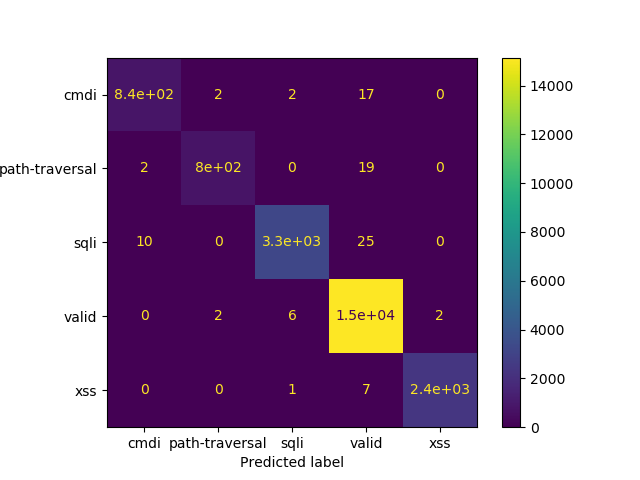

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid, testX, testY)

In [17]:
grid.best_params_

{'svc__C': 10, 'svc__kernel': 'rbf', 'tfidfvectorizer__ngram_range': (1, 2)}

In [18]:
pipe = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024, ngram_range = (1, 2)), SVC(C = 10, kernel = 'rbf'))

pipe.fit(trainX, trainY)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1024,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='

In [19]:
pipe.score(testX, testY)

0.995789753589789

In [20]:
preds = pipe.predict(testX)

print(classification_report(testY, preds))

                precision    recall  f1-score   support

          cmdi       0.99      0.98      0.98       865
path-traversal       1.00      0.97      0.98       822
          sqli       1.00      0.99      0.99      3288
         valid       1.00      1.00      1.00     15156
           xss       1.00      1.00      1.00      2433

      accuracy                           1.00     22564
     macro avg       0.99      0.99      0.99     22564
  weighted avg       1.00      1.00      1.00     22564



<IPython.core.display.Javascript object>


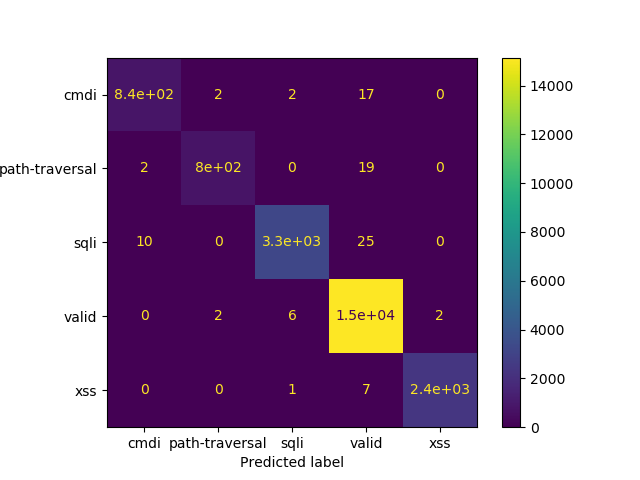

In [21]:
plot_confusion_matrix(pipe, testX, testY)

In [22]:
from sklearn.externals import joblib

joblib.dump(pipe, 'predictor.joblib')

/home/vladan/anaconda3/envs/srs/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['predictor.joblib']